## Tensors
A tensor is a fundamental data structure for neural network. A tensor is generalization of matrix. A 1-dimensional tensor is vector, a two-dimensional tensor is matrix and n-dimensional array is tensor. 

In [98]:
%config IPCompleter.greedy=True #by default the intellisense is not shown. with this line of code, it will

#import PyTorch
#Some tips for modules and installation
#If you encounter module not found, then go to Anaconda Navigator-> Environments->base(root)->Open iphyton
#In the terminal, run command pip install <packagename>
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import torch

In [145]:
def activation(x):
    """ Sigmoid activation function
        Arguements
        ----------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    
    
def show_next_image(data_set:torch.utils.data.DataLoader) -> tuple:
    image, label = iter(data_set).next()
    imshow(image[0,:])
    return image, label

In [4]:
torch.manual_seed(7) #set the random seed so thigns are predictable

features = torch.randn(1, 5) #random nomral variables with five elements

weights = torch.randn_like(features) #true weights for our data. Same shape as features

bias = torch.randn(1,1) #A single value for bias

In [5]:
# Calculate the output for this neural network with input features features, weights, and bias. We will use matrix multiplication
# between features and weights and add bias element to it. The output is then passed on to activiation fucntion to generate the final result

y = activation(torch.sum(features * weights)+bias) #here we do elements by element multiplicatio and bias
print(y)

# alternatively we could use sum function on tensor
y = activation((features*weights).sum() +bias)
print(y)


tensor([[0.1595]])
tensor([[0.1595]])


In [6]:
#use matrix multiplication using torch.mm() for high performance
# We are goign to resize the weights based on teh shape of features. For matrix multiplifcation we want 1 x 5 * 5 x 1. 
# we use view on tensor and specify desired shape to get a new tensor with same data element. The view takes (row, column)
# this is simply saying activation(torch.mm(features, weigths.view(5,1))+bias). 


In [7]:
y = activation(torch.mm(features, weights.view(features.size()[1], features.size()[0])) +bias)
print(y)

tensor([[0.1595]])


## Multilayer Network
We have features and weights.The multiplicaiot of weigth and features makes a hidden units. 

             O           #One output unit 

         h1      h2      #Two hidden units
         
    x1       x2      x3  #Three inpu features
 
Our problem is expressed as below:
y = xi*wi + b

                                                                 [w11 w12]
                                                                 [w11 w12]
     The hidden lay h is calcualed as h=[h1,h2] = [x1,x2,x3..xn].[:    : ]
                                                                 [:    : ]
                                                                 [wn1 wn2]
                                                                


In [8]:


### Generate some data
#set the random seed so we are getting the same set of data each time
torch.manual_seed(7)

#Features are three random normal variables
features = torch.rand((1,3))

#Define the size of each layer in the network
n_input = features.shape[1] #Number of input units, this must match the number of input features. our input features is 1 x 3 matrix and thus we have 3 features in this case
n_hidden = 2 #Number of hidden units
n_output = 1 #Number of outputs


#weigths for input to hidden layer
w1 = torch.rand(n_input, n_hidden)

#Weights for hidden layer to output layer
w2 = torch.randn(n_hidden, n_output)

#Bias
B1 = torch.randn((1,n_hidden))
B1 = torch.randn((1,n_output))


#printing input data
print("Features:")
print(features)

print("Weights of features:")
print(w1)

print("Weights of hidden units:")
print(w2)

h = activation(torch.mm(features, w1)+B1)
output = activation(torch.mm(h, w2)+B1)


print("Hidden Units:")
print(h)
print("Output:")
print(output)




Features:
tensor([[0.5349, 0.1988, 0.6592]])
Weights of features:
tensor([[0.6569, 0.2328],
        [0.4251, 0.2071],
        [0.6297, 0.3653]])
Weights of hidden units:
tensor([[ 0.3775],
        [-0.9509]])
Hidden Units:
tensor([[0.2959, 0.2123]])
Output:
tensor([[0.1409]])


## Numpy to Torch and back
Numpy array and Torch are reversible. Memory is shared. Tensor has datatype information while numpy array does not have that info within the data structure.

In [10]:
import numpy as np               #import numpy
np.random.seed(7)
a = np.random.rand(4,3)          #a numpy array
print(a)
b = torch.from_numpy(a)          #creata a tensor from numpy array\
print(b)                         #note than tensor always have dtype which ndarray does not


[[0.07630829 0.77991879 0.43840923]
 [0.72346518 0.97798951 0.53849587]
 [0.50112046 0.07205113 0.26843898]
 [0.4998825  0.67923    0.80373904]]
tensor([[0.0763, 0.7799, 0.4384],
        [0.7235, 0.9780, 0.5385],
        [0.5011, 0.0721, 0.2684],
        [0.4999, 0.6792, 0.8037]], dtype=torch.float64)


In [11]:
b.numpy()                        #gives back numpy array. Memory is shared between numpy and torch
b.mul_(2)                        #inplace operation of multipying by 2 on tensor, changes the value of numpy array
print(a)                        #Notice the changed values
print(b)


[[0.15261658 1.55983758 0.87681846]
 [1.44693036 1.95597902 1.07699174]
 [1.00224093 0.14410227 0.53687796]
 [0.999765   1.35845999 1.60747807]]
tensor([[0.1526, 1.5598, 0.8768],
        [1.4469, 1.9560, 1.0770],
        [1.0022, 0.1441, 0.5369],
        [0.9998, 1.3585, 1.6075]], dtype=torch.float64)


## Neural Networks in PyTorch
Deep implies network consisteing of massive layers. PyTorch's nn module simplifies the building of network consisteing of matrcies. 

In [37]:
#Import necessary pacakges

#
# Explain what is %matplotlib and %config InlineBackend do
#

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper

import matplotlib.pyplot as plt

#Use MNIST dataset which consists of greyscale hand written digits. 
#Each image is 28x28 pixels. Our goal is to build a neural network 
#that can take one of these images and predict the digit in the image.
from torchvision import datasets, transforms

#define a transform to normalize the data
transform = transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

#Download the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)

#Everytime we are getting images, we are getting a batch of 64 images.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)



We have the training data loaded into trainloader and we can use iterator and loop through the data.
Using iter is same as using for loop as below:
for image, label in trainloader:
    print(image.shape)


In [31]:
trainloader
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


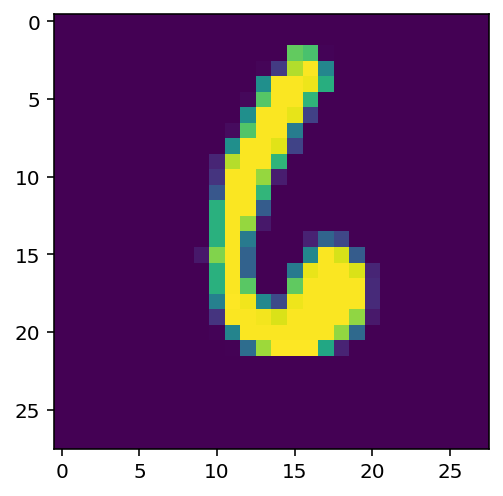

In [38]:
plt.imshow(images[1].numpy().squeeze())

Flatten the batch of images images to build a multi-layer network.
We have 64 images. Each image is of dimension 1 (channel) x 28 (height) x 28 (width). Thus one layer is really (64, 1, 28, 28). When this is flattened, we have 64 x 784 as we flattened teh 2D image to 1D vector.

We have 256 hidden units, and 10 output units using random tensors for the weights and biases. We want 10 output to get probability for each of the numbers 0,1,2..9. 

In the network, we want to pass an image and get out a probability distribution over the classes that tells the likelihood of image belonging to those classes. 

In [41]:
#Activiation function was previously defined (sigmoid)

#Flatten the input images
inputs = images.view(images.shape[0], -1) #-1 is shortcut to match the best shape

#Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1)+b1)
out = torch.mm(h,w2)+b2

print(out)




tensor([[ -4.0037, -10.5920, -15.2532,   1.6932,  18.8478,  13.8026,  -3.8765,
           7.3375, -20.3124,   8.8694],
        [ -3.7280,  -2.2973, -17.0857,   1.9139,  15.2778,   1.5556,   1.2317,
          10.5055, -21.7185,  -0.2940],
        [ -4.4372,  -4.7429, -16.9171,  -0.9745,  16.7698,  12.0000,   2.1957,
          -0.5961, -18.2544,  -4.6790],
        [ -1.9408,  -2.6723, -12.7742,   0.2631,  17.1021,  13.0295,  15.8355,
           8.0205, -21.1886,   0.5963],
        [ -6.8978, -10.9951,  -8.9972,   1.5503,  13.9366,   9.8109,  -2.4642,
          -2.8042, -19.7631,  -8.9857],
        [-11.1233,  -3.1031, -17.2671,  -1.8600,  19.3763,  14.6103,   7.9895,
          -3.6405, -20.4525,  -7.7252],
        [  9.2281,  -9.0607, -13.2973,   1.6014,  25.8930,   9.6311,  12.4725,
          15.1879, -15.0954,  -4.9090],
        [  3.3918,  -4.1994, -17.2525,  -0.3851,  16.1968,   6.7080,  -2.1579,
           9.5091, -20.8402, -10.2223],
        [  3.0596,  -8.4707, -21.2103,   4.5876,

## Softmax function
What does softmax do? 

In [44]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with PyTorch using nn module

In [46]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #input to hidden layer
        self.hidden = nn.Linear(784,256)
        
        #hidden to output
        self.output = nn.Linear(256,10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [47]:
#create a model using the class
model = Network()

In [48]:
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [ ]:
#Alternaive way to build network is using funcational module
#fairly similar to pevious way
#Normally imported as capital F.
# A little succinct


In [49]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #input to hidden layer
        self.hidden = nn.Linear(784,256)
        #hidden to output
        self.output = nn.Linear(256,10)        
        
        
    def forward(self, x):
        #Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        #Output layer with Softmax actication
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [50]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [59]:
#Lets crate a model with two hidden layer with ReLU, one input and one output

model = nn.Sequential(
    nn.Linear(784,128), 
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [78]:
#Define a loss
criterion = nn.NLLLoss()

#get data
images, labels = next(iter(trainloader))

#flatten images
images = images.view(images.shape[0],-1)

#forward pass, get out logits
logps = model(images)

#calculate the loss with the logits and the lables
loss = criterion(logps, labels)
print(loss)

tensor(2.3132, grad_fn=<NllLossBackward>)


In [74]:
#Autograd automatically calcualtes gradients for tensors which is simple a switch for tensors
x = torch.zeros(1, requires_grad=True)
print(x)

#globally it can be set with torch.set_grad_enabled(True | False)

y = x**2
print(y)


tensor([0.], requires_grad=True)
tensor([0.], grad_fn=<PowBackward0>)


True

In [79]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 tensor([[-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        ...,
        [-0.0061, -0.0061, -0.0061,  ..., -0.0061, -0.0061, -0.0061],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012]])
After backward pass: 
 tensor([[-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0037, -0.0037, -0.0037,  ..., -0.0037, -0.0037, -0.0037],
        [-0.0043, -0.0043, -0.0043,  ..., -0.0043, -0.0043, -0.0043],
        ...,
        [-0.0087, -0.0087, -0.0087,  ..., -0.0087, -0.0087, -0.0087],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0048,  0.0048,  0.0048,  ...,  0.0048,  0.0048,  0.0048]])


In [87]:
#Optimizer is used to update teh weights with the gradients. This is available in optim package

from torch import optim

#Optimizer requires the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.001)



print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64,784)

optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output, labels)
loss.backward()

print('Gradient -', model[0].weight.grad)

optimizer.step()
print('Updated weights -', model[0].weight)

Initial weights -  Parameter containing:
tensor([[ 0.0177,  0.0150,  0.0161,  ...,  0.0046,  0.0185, -0.0028],
        [-0.0138, -0.0072,  0.0218,  ...,  0.0114,  0.0220,  0.0060],
        [ 0.0254, -0.0203,  0.0050,  ...,  0.0232, -0.0088, -0.0013],
        ...,
        [ 0.0112,  0.0326, -0.0263,  ..., -0.0066, -0.0066, -0.0119],
        [-0.0239, -0.0044, -0.0199,  ..., -0.0016,  0.0225,  0.0034],
        [-0.0238, -0.0019, -0.0098,  ..., -0.0143, -0.0083,  0.0322]],
       requires_grad=True)
Gradient - tensor([[-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        ...,
        [-0.0053, -0.0053, -0.0053,  ..., -0.0053, -0.0053, -0.0053],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007]])
Updated weights - Parameter containing:
tensor([[ 0.0

In [112]:
#Final Model


model = nn.Sequential(
            nn.Linear(784,128), 
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10),
            nn.LogSoftmax(dim=1)
        )
criterion = nn.NLLLoss()
optimizer = optimizer = optim.SGD(model.parameters(), lr=0.05)
epoch = 5

for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        output = model.forward(images)
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

print('Last loss was 0.2635434596205571')
        

Training loss: 0.5218960524542626
Training loss: 0.23290917393304647
Training loss: 0.16780525905244958
Training loss: 0.13337222628617115
Training loss: 0.11093939403826589
Training loss: 0.09442869992529564
Training loss: 0.08385049485202346
Training loss: 0.07471964332505442
Training loss: 0.0663720972794813
Training loss: 0.06007774040373022
Training loss: 0.05360310056310361
Training loss: 0.04883436949328899
Training loss: 0.04461260826109962
Training loss: 0.04171621272714485
Training loss: 0.03784318605251958
Last loss was 0.2635434596205571


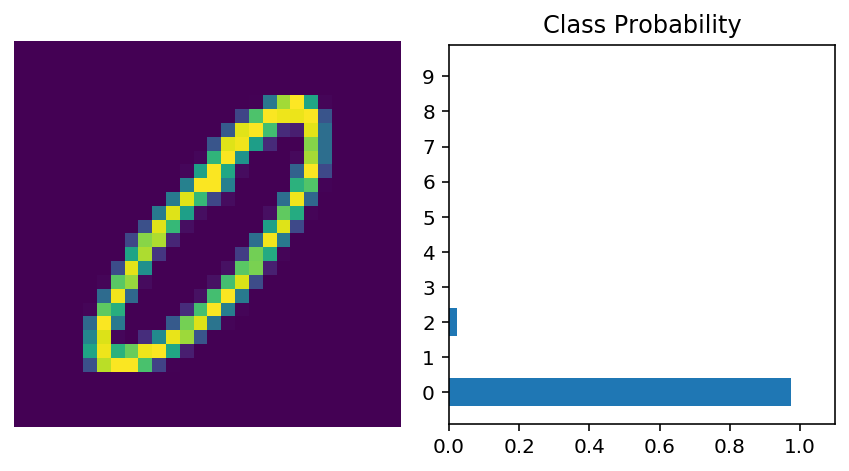

In [114]:
#Lets do prediction now

%matplotlib inline
import helper

images, labels = next(iter(trainloader))
img = images[0].view(1,784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28,28), ps)


In [146]:
#Obtain fasion mnist dataset

#Use MNIST dataset which consists of greyscale hand written digits. 
#Each image is 28x28 pixels. Our goal is to build a neural network 
#that can take one of these images and predict the digit in the image.

from torchvision import datasets, transforms

#define a transform to normalize the data
transform_fashion = transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
training_fashion = datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transform_fashion, target_transform=None)
#Everytime we are getting images, we are getting a batch of 64 images.
train_batch_fashion = torch.utils.data.DataLoader(training_fashion, batch_size=64, shuffle=True)

In [148]:
#Fashion mnist dataset

#Network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [149]:

model = Classifier()    #Define model
criterion = nn.NLLLoss()    #Define criterion
optimizer = optim.Adam(model.parameters(), lr=0.05)    #Define criterion a different one than SDG

epoch = 5



for e in range(epoch):
    running_loss = 0
    for images, labels in train_batch_fashion:
        images[1]
        logps = model(images)    #reshaping is happening in the classifier. This is short cut to passing a model and do forward pass
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()     
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")        

Training loss: 1.5152292185183018
Training loss: 1.8625791829023788
Training loss: 1.9242506353839883
Training loss: 1.855768910857406
Training loss: 1.8508604894568925


In [150]:
#Predict

dataiter = iter(train_batch_fashion)
images, labels = dataitem.next()
img = images[1]

ps = torch.exp(model(img))

view_classify(img, ps, version='Fashion')

NameError: name 'dataitem' is not defined